In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [24]:
#data

w=np.ones((10,10))
b=np.zeros((100,100))
b[0:10,0:10]=w
b[10:20,10:20]=w
s=b[0:20,0:20]
c=np.tile(s,(5,5))
train_X=1.*c


In [25]:
tf.compat.v1.disable_eager_execution()
hiddenUnits = 5
visibleUnits = len(train_X)
vb =tf.compat.v1.placeholder("float", [visibleUnits]) 
hb = tf.compat.v1.placeholder("float", [hiddenUnits])
W = tf.compat.v1.placeholder("float", [visibleUnits, hiddenUnits])
v0 = tf.compat.v1.placeholder("float", [None, visibleUnits])

In [26]:
#Phase 1: Input Processing
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random.uniform(tf.shape(_h0))))#sample h given X

#Phase 2: Reconstruction

_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random.uniform(tf.shape(_v1))))#sample v given h
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)


In [27]:
#Learning rate
alpha = 0.08
#Create the gradients

    
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence 
CD = (w_pos_grad - w_neg_grad) / tf.compat.v1.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)
 


In [28]:
#set the error function, which in this case will be the Mean Absolute Error Function.

err = v0 - v1 
err_sum = tf.reduce_mean(err * err)



In [29]:
#initialize our variables.


cur_w = np.zeros([visibleUnits, hiddenUnits])

cur_vb = np.zeros([visibleUnits])

cur_hb = np.zeros([hiddenUnits])
    
prv_w = np.zeros([visibleUnits, hiddenUnits])

prv_vb = np.zeros([visibleUnits])

prv_hb = np.zeros([hiddenUnits])


sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())



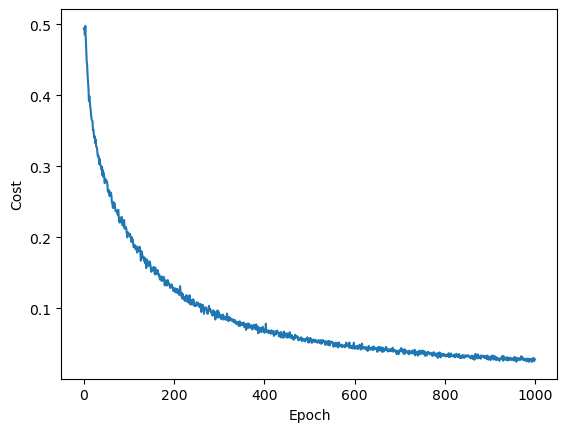

In [30]:
#training

epochs = 1000
batchsize = 50
errors1 = []
errors2 = []
weight=[]




for i in range(epochs):
    for start, end in zip( range(0, len(train_X), batchsize), range(batchsize, len(train_X), batchsize)):
        batch = train_X[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
        
        
        errors1.append(sess.run(err_sum, feed_dict={v0: train1_X, W: cur_w, vb: cur_vb, hb: cur_hb}))

        
        
        
        
        
    
    

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('errors vs epoch')
# ax1.plot(errors1)
# ax2.plot(errors2)
                                

                                
plt.plot(errors1)

plt.ylabel('Cost')
plt.xlabel('Epoch')


plt.show()


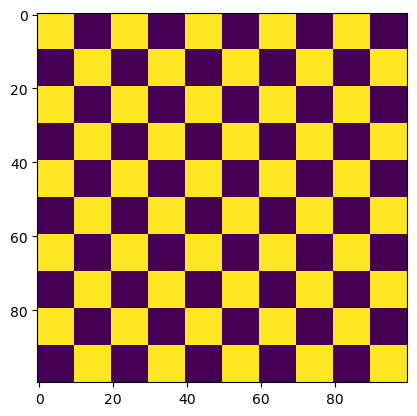

In [33]:
#data
plt.imshow(train_X)


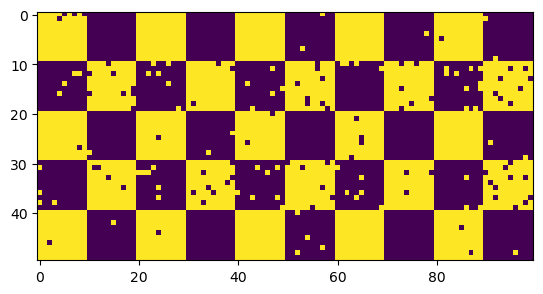

In [34]:
#old data  

cur_v1=sess.run(v1, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})

plt.imshow(cur_v1)

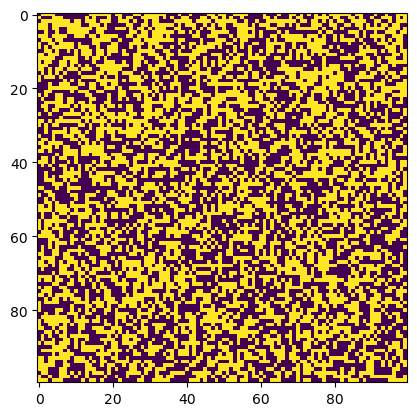

In [35]:
#new data
                
n=100
s = [0,1]
rand = np.random.choice(s,(n,n))
plt.imshow(rand)

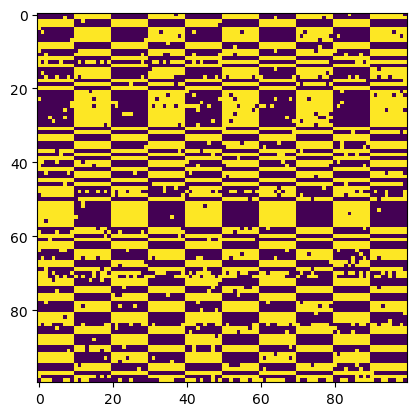

In [36]:
#reconstructed data

new=sess.run(v1, feed_dict={v0: rand, W: prv_w, vb: prv_vb, hb: prv_hb})
plt.imshow(new)
